# Thinkful Capstone 2: Supervised Learning
## Google Analytics Customer Propensity

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ds_useful as ds

[My Useful Data Science Functions](https://github.com/cobyoram/python-for-data-scientists/blob/master/ds_useful.py)

In [28]:
raw_goog = pd.read_csv('../google-analytics/Google Analytics.csv')
print(raw_goog.shape)
raw_goog.head()

(12410, 18)


,fullVisitorId,NumberOfTransactions,OrderedAmount,FrequencyRowNumber,MonetoryRowNumber,LastVisitedDays,RecencyScore,FrequecyScore,MonetoryScore,RFMScore,pageviews,sessionQualityDim,referralPath,medium,browser,operatingSystem,isMobile,continent
0,199756139590139879,3,299550000,1,14,70,4,5,4,13,75.0,NaN,NaN,(none),Chrome,Chrome OS,False,Americas
1,361534245405505016,1,139650000,3,30,60,4,5,4,13,12.0,NaN,NaN,(none),Chrome,Macintosh,False,Asia
2,9006674589877323297,1,99990000,5,36,60,4,5,4,13,17.0,NaN,NaN,(none),Chrome,Linux,False,Americas
3,1639589047263376521,1,59990000,6,49,60,4,5,4,13,19.0,NaN,/,(none),Chrome,Macintosh,False,Americas
4,6914629838067650341,1,55990000,9,57,60,4,5,4,13,25.0,NaN,NaN,(none),Chrome,Macintosh,False,Americas


In [29]:
ds.missingness_summary(raw_goog)

sessionQualityDim       100.000000
referralPath             72.135375
pageviews                 0.008058
continent                 0.000000
RecencyScore              0.000000
NumberOfTransactions      0.000000
OrderedAmount             0.000000
FrequencyRowNumber        0.000000
MonetoryRowNumber         0.000000
LastVisitedDays           0.000000
MonetoryScore             0.000000
FrequecyScore             0.000000
isMobile                  0.000000
RFMScore                  0.000000
medium                    0.000000
browser                   0.000000
operatingSystem           0.000000
fullVisitorId             0.000000
dtype: float64

In [30]:
raw_goog['referralPath'].unique()

array([nan, '/', '/mail/u/0/', '/yt/about/',
       '/od/Things-To-Do-in-Silicon-Valley/fl/How-To-Visit-the-Googleplex-the-Google-Head-Office-in-Mountain-View.htm',
       '/forum/m/', '/forum/', '/analytics/web/',
       '/intl/ALL/permissions/using-the-logo.html',
       '/permissions/using-the-logo.html', '/mail/ca/u/0/',
       '/YKEI_mrn/items/c10b14f9a69ff71b1b7a', '/sticker',
       '/analytics/web/inpage_launch',
       '/intl/th/permissions/using-the-logo.html', '/url',
       '/google-merchandise-store', '/search/GGweb.jhtml',
       '/2015/03/11/google-merch-store-new-url/',
       '/intl/es/permissions/using-the-logo.html', '/yt/about/th/',
       '/yt/about/tr/', '/yt/about/ja/', '/yt/about/ru/', '/yt/about/hi/',
       '/l.php', '/yt/about/zh-CN/', '/yt/about/es-419/', '/yt/about/lt/',
       '/yt/about/fr/', '/yt/about/ko/', '/yt/about/cs/', '/yt/about/ar/',
       '/yt/about/it/', '/yt/about/sr/', '/yt/about/en-GB/',
       '/yt/about/vi/', '/yt/about/zh-TW/', '/yt/abou

In [31]:
raw_goog['medium'].value_counts()

(none)       5027
organic      4156
referral     2763
affiliate     222
cpc           183
cpm            59
Name: medium, dtype: int64

In [32]:
ds.repeats_summary(raw_goog)

NumberOfTransactions    99.057212
OrderedAmount           99.057212
isMobile                68.170830
continent                0.000000
FrequencyRowNumber       0.000000
MonetoryRowNumber        0.000000
LastVisitedDays          0.000000
RecencyScore             0.000000
FrequecyScore            0.000000
MonetoryScore            0.000000
RFMScore                 0.000000
pageviews                0.000000
sessionQualityDim        0.000000
referralPath             0.000000
medium                   0.000000
browser                  0.000000
operatingSystem          0.000000
fullVisitorId            0.000000
dtype: float64

In [33]:
# missing_zero_repeat_ind = pd.Series()

# for col in raw_goog.columns:
#     missing_zero_repeat_ind.(raw_goog.loc[raw_goog[col] == raw_goog[col].mode().iloc[0]].index)

# missing_zero_repeat_index


In [6]:
data = pd.read_csv('../capstone_1_proposal/energy_dataset.csv')
data.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [7]:
energy = data.copy()
energy.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [8]:
missings = ds.missingness_summary(energy, print_log=True)
energy.describe()

energy.drop(missings.loc[missings == 100].index, axis=1, inplace=True)

generation hydro pumped storage aggregated     100.000000
forecast wind offshore eday ahead              100.000000
total load actual                                0.102669
generation marine                                0.054187
generation waste                                 0.054187
generation hydro pumped storage consumption      0.054187
generation hydro run-of-river and poundage       0.054187
generation fossil oil                            0.054187
generation biomass                               0.054187
generation wind offshore                         0.051335
generation wind onshore                          0.051335
generation solar                                 0.051335
generation fossil hard coal                      0.051335
generation other                                 0.051335
generation fossil gas                            0.051335
generation hydro water reservoir                 0.051335
generation fossil coal-derived gas               0.051335
generation fos

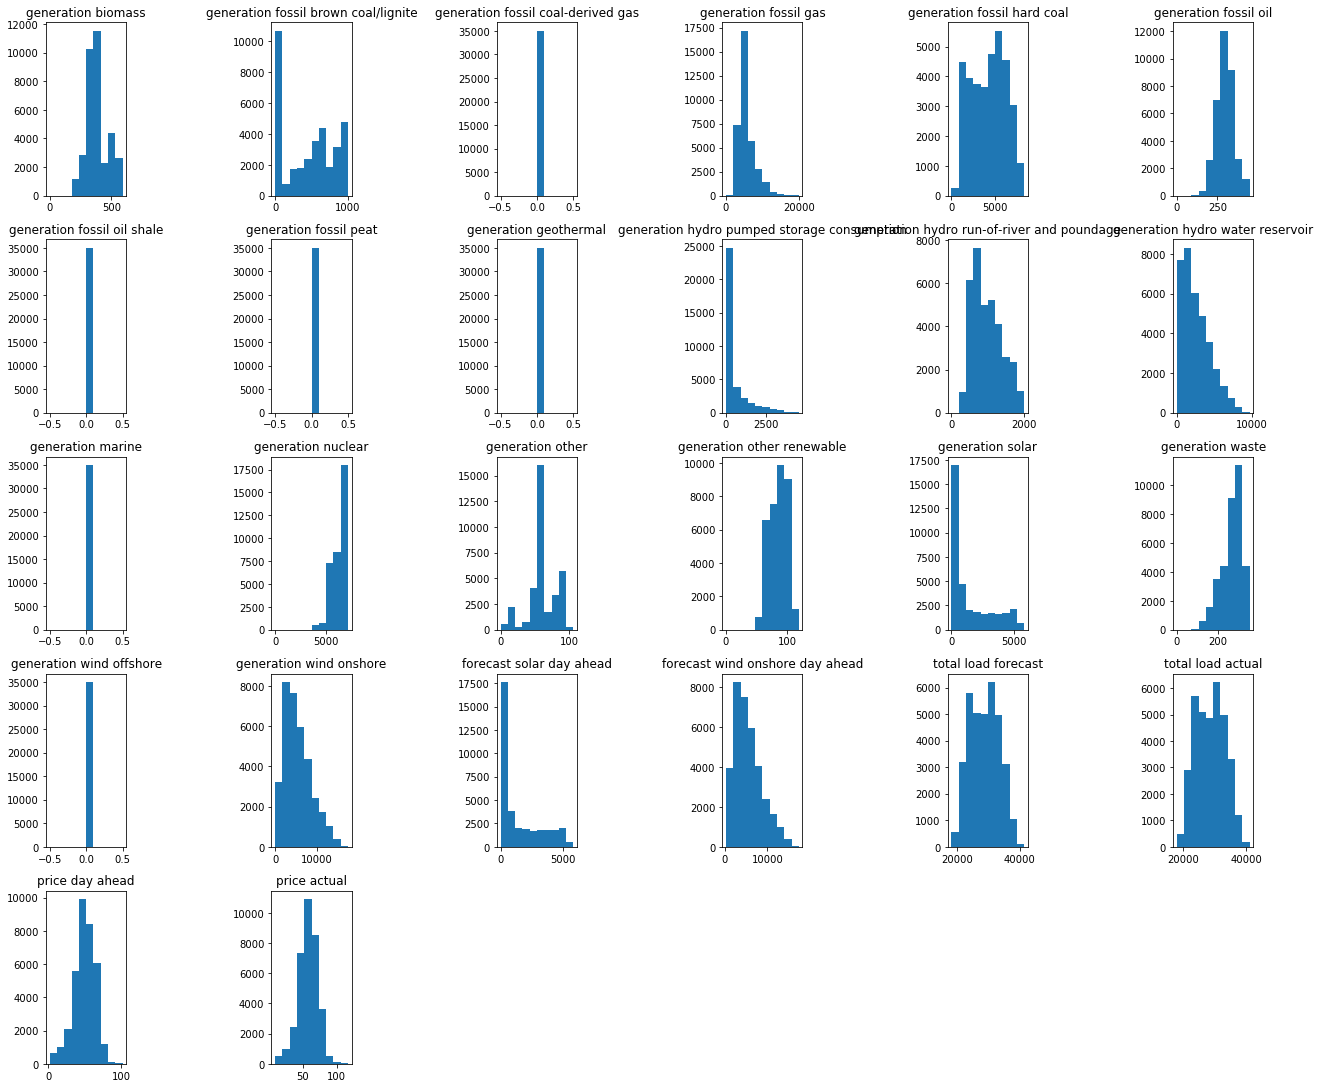

In [9]:
def plot_hist(df, col):
    plt.hist(df[col])

ds.make_subplots(energy.select_dtypes('number'), plot_hist)